### Student Information
Name: 黃柏維

Student ID: 110062659

GitHub ID: v54dt

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

# Part 1

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [ ]:
for i in twenty_train.data[:2]:
    print(i)

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
#Answer here
print(X["text"].sample())

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [ ]:
# Answer here
X.loc[lambda f: f.category_name== 'comp.graphics'].iloc[::10][0:5]

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [ ]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

In [ ]:
NA_df['missing_example'].isnull()

In [ ]:
# Answer here
'''
isnull() only finds an array-like object. So for ['C'] and ['D'], 'NaN' and 'None' are consider an array.
np.nan and ['E'] None are null. ['F'] has a array but with empty element.

'''

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
X[0:10]
 
# no, there is no changes to X dataframe. Only X_sample changes for every execution.

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [ ]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts())*1.1
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                          title = 'Category distribution',
                                          ylim = [0, upper_bound],
                                          rot = 0,
                                          fontsize = 12,
                                          figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [ ]:
# Answer here
x_pos = np.arange(4)
plt.bar(x_pos-0.1,X.category_name.value_counts(),0.2)
plt.bar(x_pos+0.1,X_sample.category_name.value_counts(),0.2)

#plt.bar(x_pos,X_sample.category_name.value_counts(),2)
#plt.bar(x_pos + 1,X.category_name.value_counts(),2)

plt.xticks(x_pos,("soc.religion.christian","sci.med","comp.graphics","alt.atheism"))
plt.title("category distribution")
plt.legend(["category_name","category_name"])

plt.show()

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [ ]:
# Answer here
analyze(" ".join(list(X[:1].text)))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here

temp = X_counts[4,0:100].toarray()

for i in range(100):
    if temp[0][i] == 1:
        print(count_vect.get_feature_names()[0:100][i])


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# Answer here

count_vector = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
temp = [i for i in range(X_counts.shape[1])]
temp.sort(key = lambda s: term_frequencies[s], reverse = True)
X_top20 = temp[:20]

plot_x = ["term_" + count_vect.get_feature_names()[i] for i in X_top20]
plot_y = ["doc_" + str(i) for i in list (X.index)[0:20]]
plot_z = X_counts[0:20,tuple(X_top20)].toarray()

df_todraw = pd.DataFrame(plot_z,columns = plot_x,index=plot_y)
plt.subplots(figsize=(9,7))
ax= sns.heatmap(df_todraw, cmap = "PuRd",vmin =0,vmax = 20,annot= True)


### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
plt.figure(figsize=(30,25))

ax1 = plt.subplot(131,projection = '3d')
ax2 = plt.subplot(132,projection = '3d')
ax3 = plt.subplot(133,projection = '3d')


for c ,category in zip(col,categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c=c,marker='o')
    ax2.scatter(xs, ys, zs, c=c,marker='o')
    ax3.scatter(xs, ys, zs, c=c,marker='o')
    
ax1.view_init(25,-45)
ax2.view_init(25,0)
ax3.view_init(25,45)

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
import plotly.graph_objects as go
from plotly.offline import iplot

x_selected = []
y_selected = []

for i in range(len(count_vect.get_feature_names())):
    if term_frequencies[i] > 100:
        x_selected.append(count_vect.get_feature_names()[i])
        y_selected.append(count_vect.get_feature_names()[i])

fig = go.Figure(
    data  = [go.Bar(x=x_selected, y = y_selected)]
)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [ ]:
# Answer here
plt.subplots(figsize=(100, 10))

x_selected = []
y_selected = []

for i in range(len(count_vect.get_feature_names())):
    if term_frequencies[i] > 500:
        x_selected.append(count_vect.get_feature_names()[i])
        y_selected.append(term_frequencies[i])
            

g = sns.barplot(x=x_selected,y = y_selected)
g.set_xticklabels(x_selected, rotation = 90);



### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here


long_tail_distribution = np.sort(term_frequencies)[::-1]

x = []
#x = [i+1 for i in range(len(long_tail_distribution[:1000]))]
for i in range(len(long_tail_distribution[:500])):
    x.append(i+1)
y = long_tail_distribution[:500]

fig =plt.figure(figsize = (25,10))
ax = fig.add_subplot()

#print(x)
#print(y)
ax.plot(x,y,linewidth=7)



### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

# Part 2

## 1. The Data

In [2]:
# Part 2

## 1. The Data

## 2. Data Prepraration

# read data
import pandas as pd
df1 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t", header=None)
df2 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt', sep="\t", header=None)
df3 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt', sep="\t", header=None)
df1.columns = ["sentence", "score"]
df2.columns = ["sentence", "score"]
df3.columns = ["sentence", "score"]

print(df1[:2])

print(df2[:2])

print(df3[:2])

print

## 3. Data Transformation

df = pd.concat([df1, df2,df3],ignore_index=True)  # combine three data set into one dataframe
for i in df['sentence'][:3]:
    
    print(i)

df[:-10]

df.iloc[::10,0:2][0:10]

df.loc[::10,'sentence'][0:10]

df[::10][0:10]

## 4. Data Mining using Pandas

df.isnull()

import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x:dmh.check_missing_values(x))

dummy_series = pd.Series(["dummy_record"], index=["sentence"])

dummy_series

result_with_series = df.append(dummy_series,ignore_index=True)

len(result_with_series)

result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

dummy_dict=[{'sentence':'dummy_record'}]

X = df.append(dummy_dict,ignore_index=True)

len(X)

X.isnull().apply(lambda x: dmh.check_missing_values(x))

X.dropna(inplace=True)

X.isnull().apply(lambda x: dmh.check_missing_values(x))

len(X)

## 4.2 Dealing with Duplicate Data

X.duplicated()  # check each row is duplicated or %notebook

sum(X.duplicated())  # calculate the amount of duplicates

sum(X.duplicated('sentence'))

X.drop_duplicates(keep=False, inplace = True)

len(X)

## 5 Data Preprocessing

X_sample = X.sample(n=1000)  # random select 1000 samples

len(X_sample)

X_sample[0:4]

import matplotlib.pyplot as plt
%matplotlib inline

print(X.score.value_counts())  # print the data`s distribution

#plot barchart for X
X.score.value_counts().plot(kind = 'bar',
                                    title = 'score',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

print(X_sample.score.value_counts())  # print the random-selected data`s distribution

#plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'score',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

## 5.2 Feature Creation

import nltk
nltk.download('punkt')

# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

X[0:4]["unigrams"]    # show senetence chopped into words

X[0:4]

list(X[0:1]['unigrams'])

## 5.3 Feature subset selection

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=50)
X_counts = count_vect.fit_transform(X.sentence)

analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

# We can check the shape of this matrix by:
X_counts.shape

# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

X[0:5]

X_counts[0:5,0:100].toarray()

count_vect.transform(['Something completely new.']).toarray()

count_vect.transform(['00 Something completely new.']).toarray()

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]  # top 50 words

plot_x

plot_y = ["doc_"+str(i) for i in list(X.index)[-20:]]  # last 20 senetences

plot_z = X_counts[-20:, 0:50].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns =plot_x, index =plot_y)
plt.subplots(figsize=(9,7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0,vmax=1,annot=True)

## 5.4 Dimensionality Reduction

from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

X_reduced.shape

col = ['coral', 'blue', 'black', 'm']
categories = [0.0,1.0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

##  5.5 Attribute Transformation / Aggregation

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## 5.6 Discretization and Binarization

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

## binarized source values to create bin_source column 
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.score)

mlb.classes_

X['bin_category'] = mlb.transform(X['score']).tolist()

X[0:9]

## 6 Data Exploration

# We retrieve 2 sentences for a random record, here, indexed at 50, 100 and 150
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

# Part 3

## 1 New Data Visulization 

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 

## preprocessing dataframe to string
df1_data = df1.to_string()
df2_data = df2.to_string()
df3_data = df3.to_string()


df1_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df1_data)
df2_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df2_data)
df3_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df3_data)

## plot amazon data
plt.title("Amazon")
plt.axis("off")
plt.imshow(df1_wordcloud, interpolation="bilinear")
plt.show()

## plot imdb data
plt.title("IMDB")
plt.axis("off")
plt.imshow(df2_wordcloud, interpolation="bilinear")
plt.show()

## plot yelp data
plt.title("Yelp")
plt.axis("off")
plt.imshow(df3_wordcloud, interpolation="bilinear")
plt.show()

## TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
X_tfidf = tfidf.fit_transform(X.sentence)

# define the xyz of the heat map
plot_x = ["term_"+str(i) for i in tfidf.get_feature_names()[0:50]]   
plot_y = ["doc_"+ str(i) for i in list(X.index)[-25:]]                          
plot_z = X_tfidf[-25:, 0:50].toarray()

# draw the heat map
df_heatmap = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(30, 15))
ax = sns.heatmap(df_heatmap, cmap="PuRd", vmin=0, vmax=1, annot=True)

## Naive Bayes Classfier

from sklearn.model_selection import train_test_split

# split train set and test set
x_train,x_test,y_train,y_test=train_test_split(X.sentence,X.score,test_size=0.3,random_state=18)

#### Generate by TFIDF

tfudf = TfidfVectorizer()
x_train_term = tfidf.fit_transform(x_train)
x_test_term = tfidf.fit_transform(x_test)

from sklearn.naive_bayes import MultinomialNB
clf_tfidf = MultinomialNB()
clf_tfidf.fit(x_train_term, y_train)
predict_x_test_term = clf_tfidf.predict(x_test_term)

# Sample query: lets's take a glance on actual and predicted score
final_df = pd.DataFrame({'sentence':list(x_test), 'score_actual': list(y_test), 'score_predicted': list(predict_x_test_term)})
final_df.iloc[::5][0:10]

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


print('Accuracy score: ', accuracy_score(y_test, predict_x_test_term))

print('Classification: ')
print(classification_report(y_test, predict_x_test_term))

plot_confusion_matrix(clf_tfidf, x_test_term, y_test)
print('Confusion matrix: ')
plt.show()

#### Generate by frequency feature

cv = CountVectorizer()
x_train_term = cv.fit_transform(x_train)
x_test_term = cv.transform(x_test)

# Prediction
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_term, y_train)
predict_x_test_term = clf.predict(x_test_term)

# Sample query: lets's take a glance on actual and predicted score
check_df = pd.DataFrame({'sentence':list(x_test), 'score_actual': list(y_test), 'score_predicted': list(predict_x_test_term)})
check_df.iloc[::5][0:10]



print('Accuracy score: ', accuracy_score(y_test, predict_x_test_term))

print('Classification: ')
print(classification_report(y_test, predict_x_test_term))

plot_confusion_matrix(clf, x_test_term, y_test)
print('Confusion matrix: ')
plt.show()

## Part 4

1. Plotting a sparse matrix makes the result hard to read, and waste computing resources.
2. There is a lot meaningless charcater in the dataset. Remove stop word may help.
3. Email data is inluded in the text data, however it is not a text data
3. Some module function in lab are depreciated in the new version of module. I think it is better to provide the module version from the begining.






SyntaxError: invalid syntax (Temp/ipykernel_2776/4081597804.py, line 402)

## 2. Data Prepraration

In [3]:
# read data
import pandas as pd
df1 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t", header=None)
df2 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt', sep="\t", header=None)
df3 = pd.read_csv('./sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt', sep="\t", header=None)
df1.columns = ["sentence", "score"]
df2.columns = ["sentence", "score"]
df3.columns = ["sentence", "score"]

In [4]:
print(df1[:2])

                                            sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1


In [5]:
print(df2[:2])

                                            sentence  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0


In [6]:
print(df3[:2])

                   sentence  score
0  Wow... Loved this place.      1
1        Crust is not good.      0


## 3. Data Transformation

In [7]:
df = pd.concat([df1, df2,df3],ignore_index=True)  # combine three data set into one dataframe
for i in df['sentence'][:3]:
    
    print(i)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [8]:
df[:-10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2733,The problem I have is that they charge $11.99 ...,0
2734,Shrimp- When I unwrapped it (I live only 1/2 a...,0
2735,"It lacked flavor, seemed undercooked, and dry.",0
2736,It really is impressive that the place hasn't ...,0


In [9]:
df.iloc[::10,0:2][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [10]:
df.loc[::10,'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

## 4. Data Mining using Pandas

In [11]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x:dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [12]:
dummy_series = pd.Series(["dummy_record"], index=["sentence"])

In [13]:
dummy_series

sentence    dummy_record
dtype: object

In [14]:
result_with_series = df.append(dummy_series,ignore_index=True)

In [15]:
len(result_with_series)

2749

In [16]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [17]:
dummy_dict=[{'sentence':'dummy_record'}]

In [18]:
X = df.append(dummy_dict,ignore_index=True)

In [19]:
len(X)

2749

In [20]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [21]:
X.dropna(inplace=True)

In [22]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [23]:
len(X)

2748

## 4.2 Dealing with Duplicate Data

In [24]:
X.duplicated()  # check each row is duplicated or %notebook

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [25]:
sum(X.duplicated())  # calculate the amount of duplicates

17

In [26]:
sum(X.duplicated('sentence'))

17

In [27]:
X.drop_duplicates(keep=False, inplace = True)

In [28]:
len(X)

2714

## 5 Data Preprocessing

In [29]:
X_sample = X.sample(n=1000)  # random select 1000 samples

In [30]:
len(X_sample)

1000

In [31]:
X_sample[0:4]

,sentence,score
1932,"Love this place, hits the spot when I want som...",1.0
888,Don't trust their website and don't expect any...,0.0
1189,I highly recommend this movie for anyone inter...,1.0
1881,The management is rude.,0.0


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

1.0    1366
0.0    1348
Name: score, dtype: int64


<AxesSubplot:title={'center':'score'}>

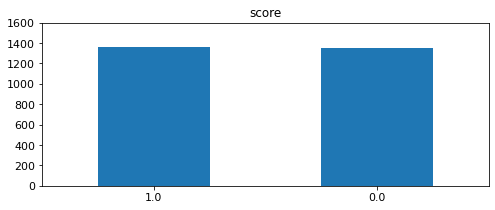

In [33]:
print(X.score.value_counts())  # print the data`s distribution

#plot barchart for X
X.score.value_counts().plot(kind = 'bar',
                                    title = 'score',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

0.0    514
1.0    486
Name: score, dtype: int64


<AxesSubplot:title={'center':'score'}>

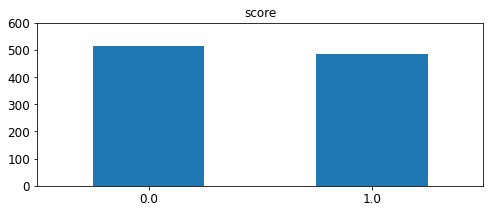

In [34]:
print(X_sample.score.value_counts())  # print the random-selected data`s distribution

#plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'score',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

## 5.2 Feature Creation

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\selab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [37]:
X[0:4]["unigrams"]    # show senetence chopped into words

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [38]:
X[0:4]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin..."


In [39]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

## 5.3 Feature subset selection

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=50)
X_counts = count_vect.fit_transform(X.sentence)

In [43]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [44]:
# We can check the shape of this matrix by:
X_counts.shape

(2714, 50)

In [45]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['all', 'an', 'and', 'are', 'as', 'at', 'bad', 'be', 'but', 'film']

In [46]:
X[0:5]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1.0,"[The, mic, is, great, .]"


In [47]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [48]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [49]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [50]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]  # top 50 words

In [51]:
plot_x

['term_all',
 'term_an',
 'term_and',
 'term_are',
 'term_as',
 'term_at',
 'term_bad',
 'term_be',
 'term_but',
 'term_film',
 'term_food',
 'term_for',
 'term_from',
 'term_good',
 'term_great',
 'term_had',
 'term_has',
 'term_have',
 'term_if',
 'term_in',
 'term_is',
 'term_it',
 'term_just',
 'term_like',
 'term_movie',
 'term_my',
 'term_not',
 'term_of',
 'term_on',
 'term_one',
 'term_out',
 'term_phone',
 'term_place',
 'term_really',
 'term_service',
 'term_so',
 'term_that',
 'term_the',
 'term_there',
 'term_they',
 'term_this',
 'term_time',
 'term_to',
 'term_very',
 'term_was',
 'term_we',
 'term_well',
 'term_were',
 'term_with',
 'term_you']

In [52]:
plot_y = ["doc_"+str(i) for i in list(X.index)[-20:]]  # last 20 senetences

In [53]:
plot_z = X_counts[-20:, 0:50].toarray()

In [54]:
import seaborn as sns

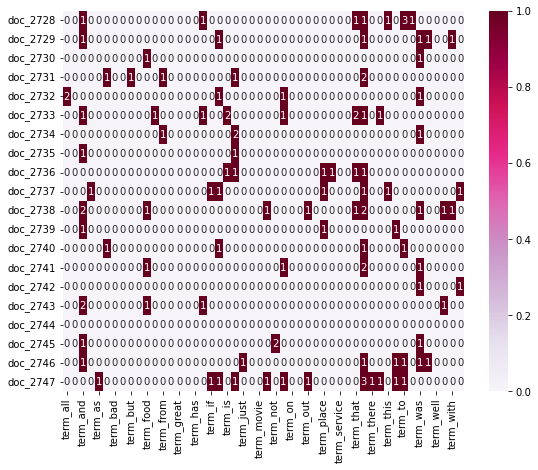

In [55]:
df_todraw = pd.DataFrame(plot_z, columns =plot_x, index =plot_y)
plt.subplots(figsize=(9,7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0,vmax=1,annot=True)

## 5.4 Dimensionality Reduction

In [56]:
from sklearn.decomposition import PCA

In [57]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [58]:
X_reduced.shape

(2714, 2)

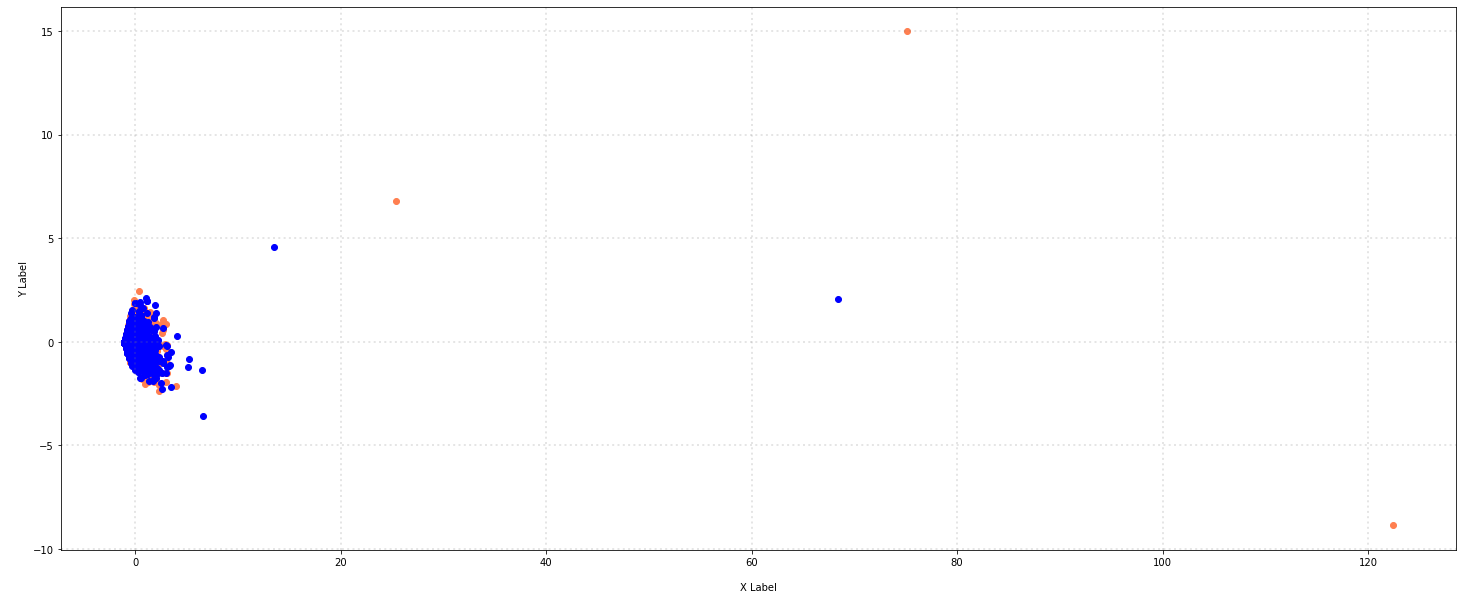

In [59]:
col = ['coral', 'blue', 'black', 'm']
categories = [0.0,1.0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

##  5.5 Attribute Transformation / Aggregation

In [61]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [62]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [63]:
term_frequencies[0]

148

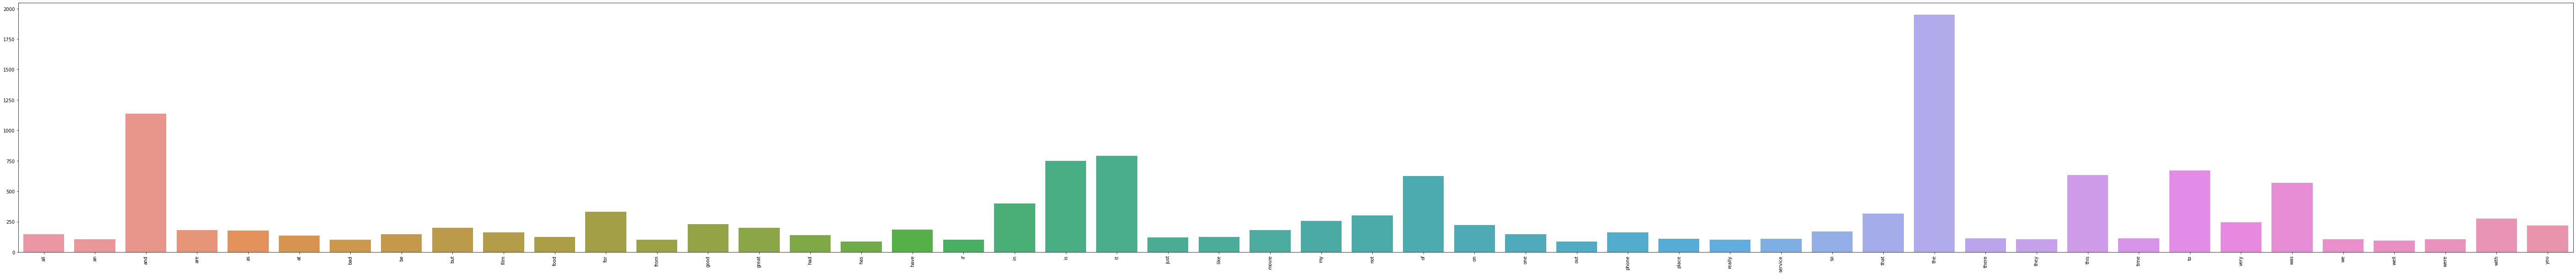

In [64]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [65]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

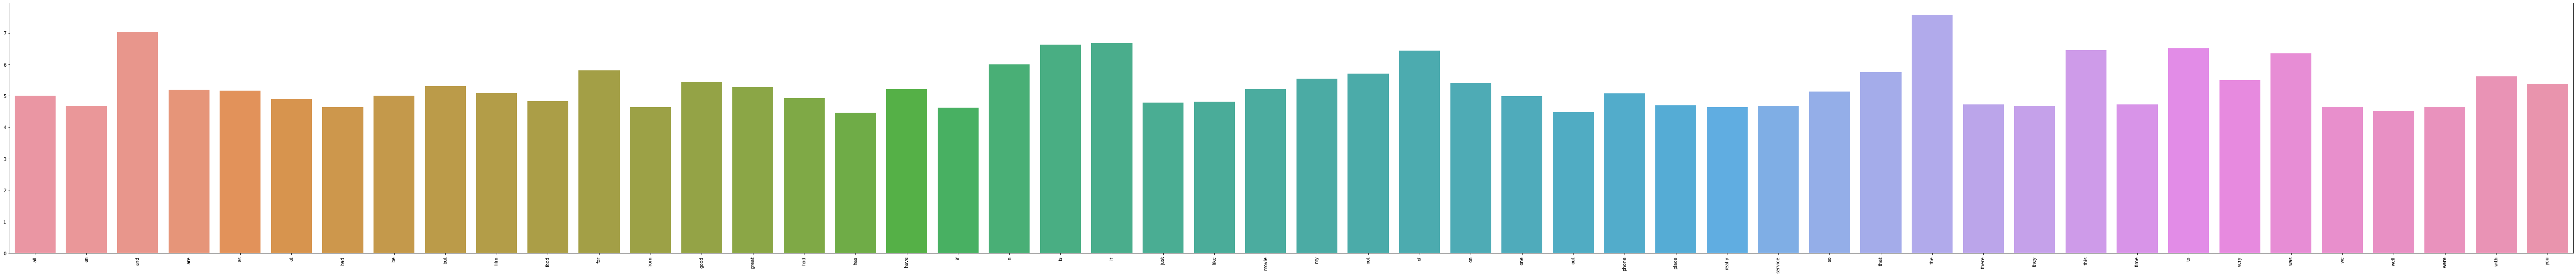

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## 5.6 Discretization and Binarization

In [67]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [68]:
## binarized source values to create bin_source column 
mlb = preprocessing.LabelBinarizer()

In [69]:
mlb.fit(X.score)

LabelBinarizer()

In [70]:
mlb.classes_

array([0., 1.])

In [71]:
X['bin_category'] = mlb.transform(X['score']).tolist()

In [72]:
X[0:9]

,sentence,score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1.0,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0.0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0.0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1.0,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0.0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


## 6 Data Exploration

In [73]:
# We retrieve 2 sentences for a random record, here, indexed at 50, 100 and 150
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [74]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [75]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0]]


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Part 3

## 1 New Data Visulization 

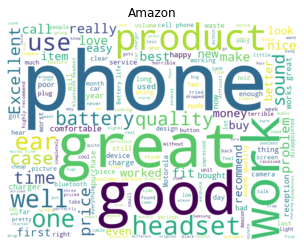

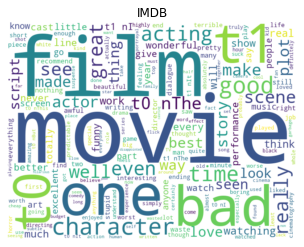

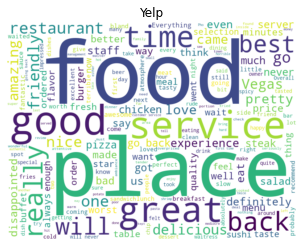

In [77]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 

## preprocessing dataframe to string
df1_data = df1.to_string()
df2_data = df2.to_string()
df3_data = df3.to_string()


df1_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df1_data)
df2_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df2_data)
df3_wordcloud = WordCloud(width=800, height=600, max_words=200, stopwords=stopwords, background_color="white").generate(df3_data)

## plot amazon data
plt.title("Amazon")
plt.axis("off")
plt.imshow(df1_wordcloud, interpolation="bilinear")
plt.show()

## plot imdb data
plt.title("IMDB")
plt.axis("off")
plt.imshow(df2_wordcloud, interpolation="bilinear")
plt.show()

## plot yelp data
plt.title("Yelp")
plt.axis("off")
plt.imshow(df3_wordcloud, interpolation="bilinear")
plt.show()

## TF-IDF

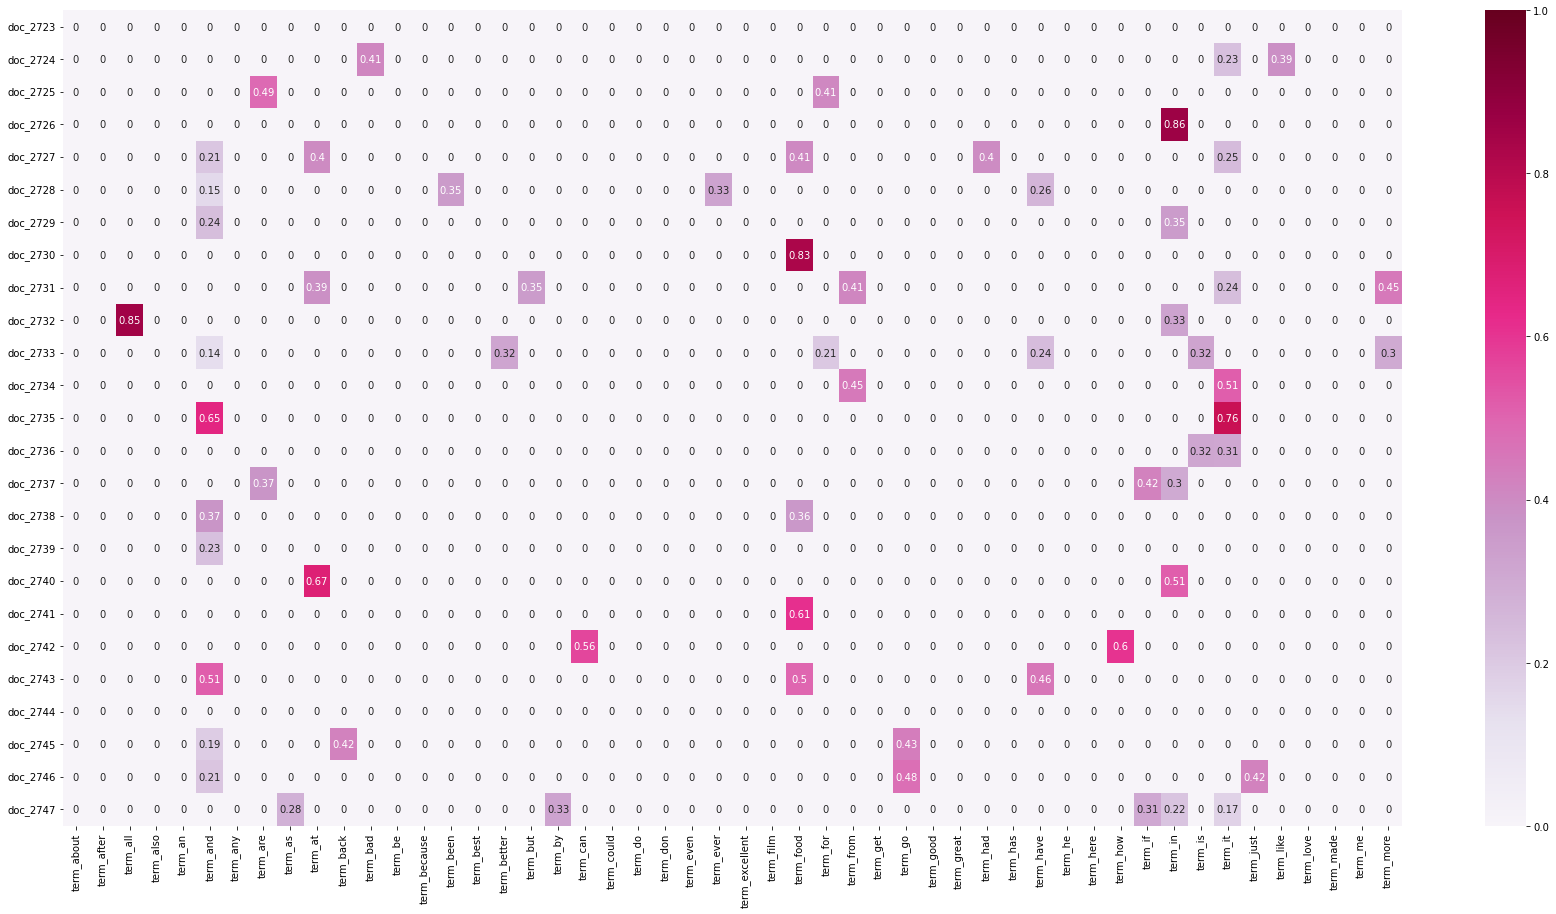

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
X_tfidf = tfidf.fit_transform(X.sentence)

# define the xyz of the heat map
plot_x = ["term_"+str(i) for i in tfidf.get_feature_names()[0:50]]   
plot_y = ["doc_"+ str(i) for i in list(X.index)[-25:]]                          
plot_z = X_tfidf[-25:, 0:50].toarray()

# draw the heat map
df_heatmap = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(30, 15))
ax = sns.heatmap(df_heatmap, cmap="PuRd", vmin=0, vmax=1, annot=True)

## Naive Bayes Classfier

In [79]:
from sklearn.model_selection import train_test_split

# split train set and test set
x_train,x_test,y_train,y_test=train_test_split(X.sentence,X.score,test_size=0.3,random_state=18)

In [80]:
#### Generate by TFIDF

In [81]:
tfudf = TfidfVectorizer()
x_train_term = tfidf.fit_transform(x_train)
x_test_term = tfidf.fit_transform(x_test)

from sklearn.naive_bayes import MultinomialNB
clf_tfidf = MultinomialNB()
clf_tfidf.fit(x_train_term, y_train)
predict_x_test_term = clf_tfidf.predict(x_test_term)

# Sample query: lets's take a glance on actual and predicted score
final_df = pd.DataFrame({'sentence':list(x_test), 'score_actual': list(y_test), 'score_predicted': list(predict_x_test_term)})
final_df.iloc[::5][0:10]

,sentence,score_actual,score_predicted
0,We had so much to say about the place before w...,0.0,1.0
5,I won't try going back there even if it's empty.,0.0,0.0
10,The block was amazing.,1.0,1.0
15,He was very impressed when going from the orig...,1.0,0.0
20,All in all an excellent restaurant highlighted...,1.0,1.0
25,It presents a idyllic yet serious portrayal of...,1.0,1.0
30,Don't waste your time watching this rubbish no...,0.0,0.0
35,Was not happy.,0.0,0.0
40,Poor Reliability.,0.0,1.0
45,"Both films are terrible, but to the credit of ...",0.0,1.0


Accuracy score:  0.5901840490797546
Classification: 
              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58       410
         1.0       0.58      0.61      0.60       405

    accuracy                           0.59       815
   macro avg       0.59      0.59      0.59       815
weighted avg       0.59      0.59      0.59       815

Confusion matrix: 


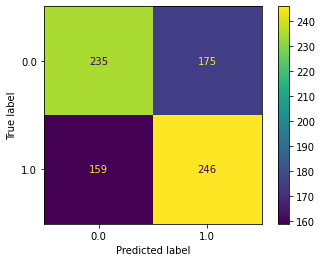

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


print('Accuracy score: ', accuracy_score(y_test, predict_x_test_term))

print('Classification: ')
print(classification_report(y_test, predict_x_test_term))

plot_confusion_matrix(clf_tfidf, x_test_term, y_test)
print('Confusion matrix: ')
plt.show()

#### Generate by frequency feature

In [83]:
cv = CountVectorizer()
x_train_term = cv.fit_transform(x_train)
x_test_term = cv.transform(x_test)

# Prediction
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_term, y_train)
predict_x_test_term = clf.predict(x_test_term)

# Sample query: lets's take a glance on actual and predicted score
check_df = pd.DataFrame({'sentence':list(x_test), 'score_actual': list(y_test), 'score_predicted': list(predict_x_test_term)})
check_df.iloc[::5][0:10]

,sentence,score_actual,score_predicted
0,We had so much to say about the place before w...,0.0,0.0
5,I won't try going back there even if it's empty.,0.0,0.0
10,The block was amazing.,1.0,1.0
15,He was very impressed when going from the orig...,1.0,0.0
20,All in all an excellent restaurant highlighted...,1.0,1.0
25,It presents a idyllic yet serious portrayal of...,1.0,1.0
30,Don't waste your time watching this rubbish no...,0.0,0.0
35,Was not happy.,0.0,1.0
40,Poor Reliability.,0.0,0.0
45,"Both films are terrible, but to the credit of ...",0.0,0.0


Accuracy score:  0.7950920245398773
Classification: 
              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       410
         1.0       0.82      0.76      0.79       405

    accuracy                           0.80       815
   macro avg       0.80      0.79      0.79       815
weighted avg       0.80      0.80      0.79       815

Confusion matrix: 


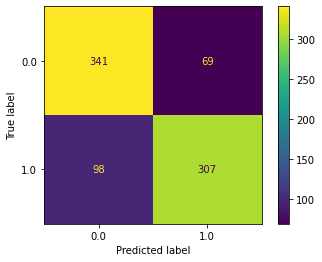

In [84]:
print('Accuracy score: ', accuracy_score(y_test, predict_x_test_term))

print('Classification: ')
print(classification_report(y_test, predict_x_test_term))

plot_confusion_matrix(clf, x_test_term, y_test)
print('Confusion matrix: ')
plt.show()

## Part 4

1. Plotting a sparse matrix makes the result hard to read, and waste computing resources.
2. There is a lot meaningless charcater in the dataset. Remove stop word may help.
3. Email data is inluded in the text data, however it is not a text data
3. Some module function in lab are depreciated in the new version of module. I think it is better to provide the module version from the begining.
